In [1]:
import pyroomacoustics as pra
import numpy as np

import sys
sys.path.append("../")
from src.file_io import load_signal_from_wav, write_signal_to_wav
from src.visualization_tools import plot_room, plot_room_views, play_audio
from src.simulation_data_utils import create_outdoor_room, circular_layout, perform_simulation

np.random.seed(0)

部屋を作成

In [ ]:
room_dim = np.array([50, 50, 50])  # 部屋の大きさ（x, y, z）
fs = 16000

room = create_outdoor_room(room_dim, fs)

マイク配置

In [3]:
height = 10  # マイクアレイの高さ（メートル）
center = room_dim / 2  # 部屋の中心をマイクアレイの中心とする
center[2] = height  # マイクアレイの高さを設定
radius = 0.05  # マイクアレイの半径（メートル）
num_mics = 8  # マイクの数

# マイクアレイの位置を計算
mic_positions = circular_layout(center, radius, num_mics)

# マイクロフォンアレイを作成して部屋に配置
mic_array = pra.MicrophoneArray(mic_positions, room.fs)
room.add_microphone_array(mic_array)

ドローンのプロペラ配置

In [4]:
num_sources = 4  # 音源の数（ドローンのプロペラ数）
source_radius = 0.2  # 音源配置の半径（メートル）
diff_z = 5
source_shift = np.array([0, 0, diff_z])  # 音源のずれ（メートル）

source_path = "../data/processed/propeller/p2000_2/dst.wav"
source_signal = load_signal_from_wav(source_path, fs)
source_signal.shape

(320000,)

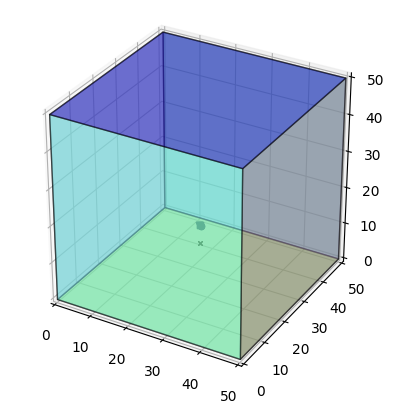

In [5]:
# 音源の位置を計算
source_positions = circular_layout(center + source_shift, source_radius, num_sources)

samples_per_source = len(source_signal) // num_sources
# 音源を部屋に追加
for i, pos in enumerate(source_positions.T):
    room.add_source(pos, signal=source_signal[samples_per_source * i:samples_per_source * (i + 1)])

plot_room(room)

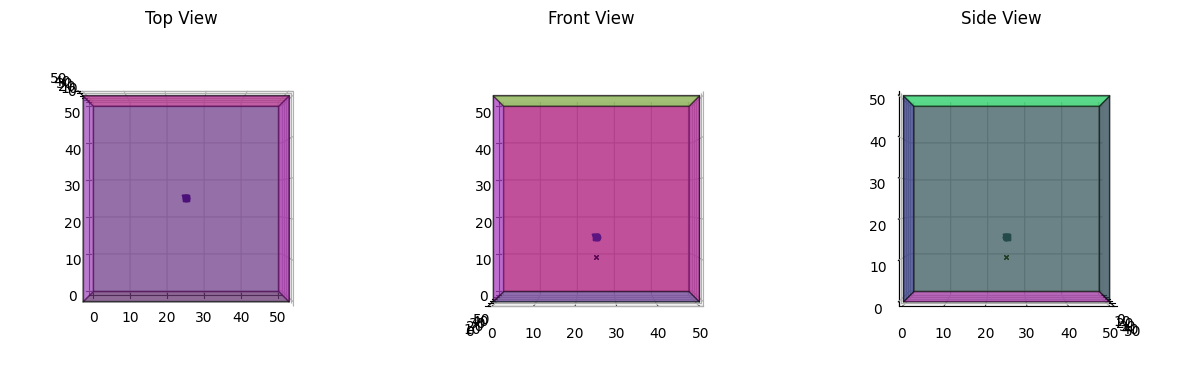

In [6]:
plot_room_views(room)

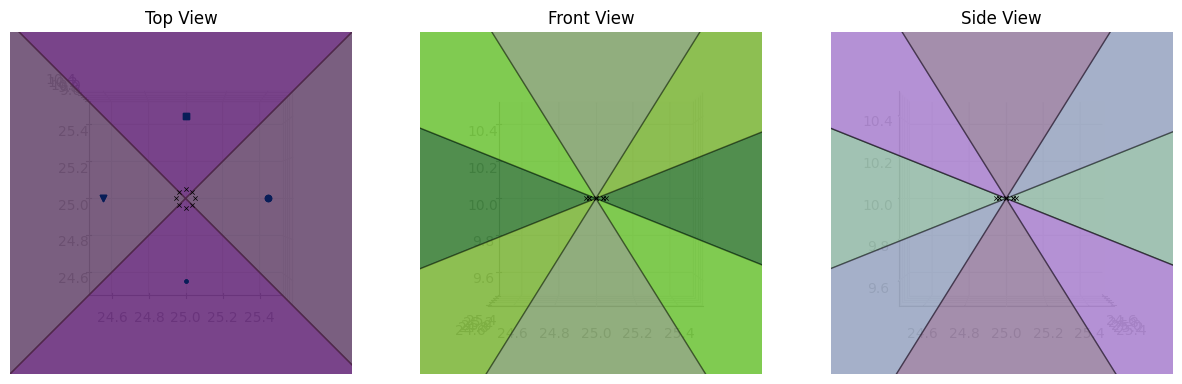

In [7]:
plot_room_views(room, zoom_center=center, zoom_size=1)

シミュレーション

In [8]:
simulated_signals = perform_simulation(room)

All sources and microphones are inside the room.


In [9]:
play_audio(simulated_signals[0], fs)

In [10]:
simulated_signals.shape

(8, 120898)

In [11]:
write_signal_to_wav(simulated_signals, f"../data/simulation/drone_{diff_z}_absorption_0.wav", fs)